# **Artificial Intelligence Project**
## Email Spam Recognition 

The final project consists of a prototype of email spam recognition based on Machine Learning techniques.

For this experiment we consider the dataset "Spam Assassin" that contains about 6000 bodies of emails with an associated label (1 for Spam, 0 for Ham).

First of all we import all the libraries that we need for manipulating the dataset, making computations, plotting and so on.

In [ ]:
# Library for importing the dataset
import pandas as pd

# Libraries for manipulate numbers
import numpy as np
import scipy as sp
from scipy import sparse

# Library for plotting
import matplotlib.pyplot as plt

# Library Natural Language ToolKit for tokenize email bodies, import set of
# stopwords and stemming
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Libraries for manipulating strings
import re
import string

# Classes from Scikit Learn Library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc

from google.colab import files

# **First step**
We first load the dataset (completeSpamAssassin) and we explore the structure dropping a useless void column. We check also the shape, the name of the columns and we see what's inside the dataset.

The spam emails are classified as '1' instead ham emails are classified as '0'.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
dataset = pd.read_csv("drive/MyDrive/completeSpamAssassin.csv")
dataset.drop('Unnamed: 0', inplace=True, axis=1)

FileNotFoundError: ignored

In [ ]:
# Print the shape of the dataset (rows, columns)
dataset.shape

In [ ]:
# Get the columns names
dataset.columns

Index(['Body', 'Label'], dtype='object')

In [ ]:
# Print the first five rows of the dataset
dataset

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


# **Second Step**
This step is a preliminary phase. We must delete the punctuation, URLs and numbers from each email body of the dataset.

Then we remove stopwords from each email body and we make a stemming for reducing words to their roots.

Finally we obtain a list of email bodies which is filtered from punctuation, URLs, numbers and stopwords and verbal forms.




In [ ]:
# Download of set of punctuation and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# This function allow us to remove URLs, punctuation, newlines and tokenize
# the email bodies. Furthermore it removes stopwords and make the stemming

def pre_processing_data(text):
  # Remove URLs
  text = re.sub(r"http\S+", "", text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]','',text)

  # Remove newlines
  text = re.sub(r'\n', ' ', text)

  # Remove numbers
  text = re.sub(r'[0-9]', '', text)

  # Tokenize
  tokens = nltk.word_tokenize(text)

  # Remove stopwords and stem
  stop_words = set(stopwords.words('english'))
  stemmer = SnowballStemmer('english')
  tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words]

  # Join tokens into a single string
  text = ' '.join(tokens)
    
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove NULL and empty values
dataset = dataset.dropna()
dataset = dataset[~dataset['Body'].str.lower().str.contains('empty')]

In [ ]:
# Apply the function defined before
data = dataset['Body'].apply(pre_processing_data).tolist()
labels = dataset['Label'].tolist()

# Print the length of data and labels for seeing if they are equal
print(len(data))
print(len(labels))

5456
5456


# **Third step**
In this step we apply the 5-fold cross-validation on the data set. We randomly subdivide it into 5 disjoint subsets of identical size.

First of all we compute the information gain using mutual_info_classif class of scikit-learn library passing the training fold vectorized by the CountVectorizer. In this way we can extract the N more influent words of the training fold.

The information gain formula used is the following:

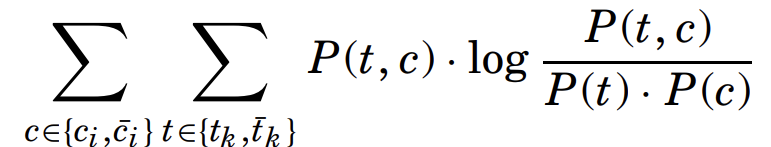

Then we compute the N-dimensional feature vector.

After we have obtained the N-dimensional feature vector for the training fold and testing fold we fit the classifier and then we pass data that has never seen before to see how many times it makes wrong classification.

Finally we have computed the misclassification rate, saving at each iteration the number of misclassifications and divide at the end for the total number of predictions done. We also plot the ROC curve for each value of feature taken into account.

## Implementation with Decision Tree Classifier

Processing for N = 100
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.31072410632447295


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

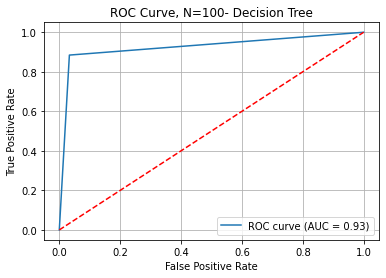

Processing for N = 500
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.30339138405132904


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

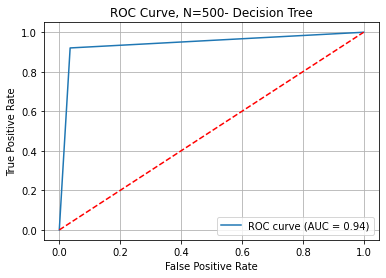

Processing for N = 1000
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.30980751604032997


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

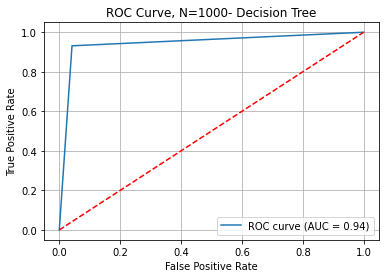

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Number of folds
k = 5

# Number of features to take into account
N_features = [100, 500, 1000]

# Perform 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

misclassification_rates = []

for N in N_features:
  misclassified = 0
  print("Processing for N =", N)
  for i, (train_index, test_index) in enumerate(kf.split(data)):
      # Separate training and test fold
      X_train, X_test = np.array(data)[train_index], np.array(data)[test_index]
      y_train, y_test = np.array(labels)[train_index], np.array(labels)[test_index]

      # fit CountVectorizer on training data
      vectorizer.fit(X_train, y_train)

      # Extract the information gain IG
      if N==100:
        feature_scores = mutual_info_classif(vectorizer.transform(X_train), y_train)
        feature_words = [word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[:100]]

      if N==500:
        feature_words.extend([word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[100:499]])

      if N==1000:
        feature_words.extend([word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[500:999]])

      # Compute the N-dimensional feature vector for training and testing folders
      train_features = vectorizer.transform(X_train)
      train_features = [[1 if word in email.split() else 0 for word in feature_words] for email in X_train]
      test_features = vectorizer.transform(X_test)
      test_features = [[1 if word in email.split() else 0 for word in feature_words] for email in X_test]

      # Print the shape of the feature matrices for this fold
      print(f'Fold {i+1} processed [{(i+1)*100//k}%]')
      print('X_train shape:', len(train_features))
      print('X_test shape:', len(test_features))

      # Train decision tree on training data and evaluate on testing data
      clf = DecisionTreeClassifier(criterion='log_loss', max_depth=70)
      clf.fit(train_features, y_train)
      predictions = clf.predict(test_features)
      misclassified += (confusion_matrix(y_test, predictions)[0,1] + confusion_matrix(y_test, predictions)[1,0])
      tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

  # Compute misclassification rate
  misclassification_rate = misclassified/len(test_features)
  print(f"Misclassification rate: {misclassification_rate}")
  misclassification_rates.append(misclassification_rate)

  # Compute the false positive rate and true positive rate at various threshold values
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Compute the AUC (area under the curve) of the ROC curve
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  %matplotlib inline
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve, N='+str(N)+'- Decision Tree')
  plt.grid()
  plt.legend(loc="lower right")
  plt.savefig('ROC_DT_'+str(N)+'.pdf', bbox_inches='tight')
  files.download('ROC_DT_'+str(N)+'.pdf')
  plt.show()
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

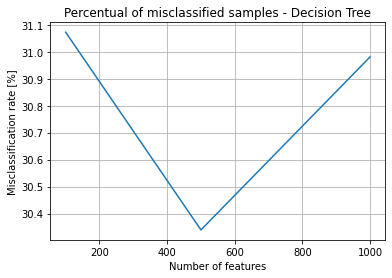

In [ ]:
misclassification_rates_percent = [100*item for item in misclassification_rates]
%matplotlib inline
# Create a figure and axis
fig = plt.figure()

# Plot the data
plt.plot(N_features, misclassification_rates_percent)

# Add labels and title
plt.xlabel('Number of features')
plt.ylabel('Misclassification rate [%]')
plt.title('Percentual of misclassified samples - Decision Tree')

# Display the plot
plt.grid()
plt.savefig('decision_tree_misclassification.pdf', bbox_inches='tight')
files.download('decision_tree_misclassification.pdf')
plt.show()

##Implementation with an Artificial Neural Network

The Artificial Neural Network is composed of three layers:
The input layer which has N nodes, 1 node for each feature of the email.
The second layer is an hidden layer which has a number of nodes equale to the square root of N.
The final layer is the output layer which has just 1 node.





Processing for N = 100
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.22548120989917506


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

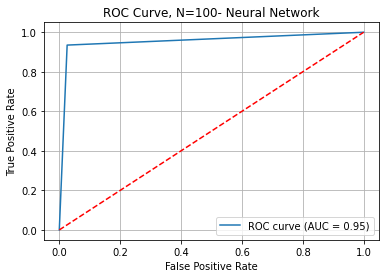

Processing for N = 500
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.17873510540788268


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

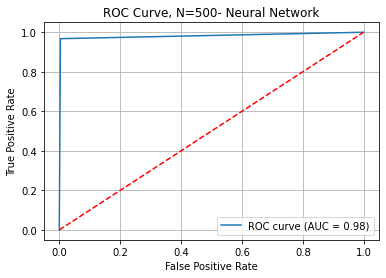

Processing for N = 1000
Fold 1 processed [20%]
X_train shape: 4364
X_test shape: 1092
Fold 2 processed [40%]
X_train shape: 4365
X_test shape: 1091
Fold 3 processed [60%]
X_train shape: 4365
X_test shape: 1091
Fold 4 processed [80%]
X_train shape: 4365
X_test shape: 1091
Fold 5 processed [100%]
X_train shape: 4365
X_test shape: 1091
Misclassification rate: 0.09807516040329972


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

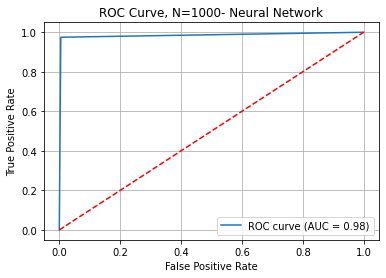

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Number of folds
k = 5

# Number of features to take into account
N_features = [100, 500, 1000]

# Perform 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

misclassification_rates = []

for N in N_features:
  misclassified = 0
  print("Processing for N =", N)
  for i, (train_index, test_index) in enumerate(kf.split(data)):
      # Separate training and test fold
      X_train, X_test = np.array(data)[train_index], np.array(data)[test_index]
      y_train, y_test = np.array(labels)[train_index], np.array(labels)[test_index]

      # fit CountVectorizer on training data
      vectorizer.fit(X_train, y_train)

      # Extract the information gain IG
      if N==100:
        feature_scores = mutual_info_classif(vectorizer.transform(X_train), y_train)
        feature_words = [word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[:100]]

      if N==500:
        feature_words.extend([word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[100:499]])

      if N==1000:
        feature_words.extend([word for _, word in sorted(zip(feature_scores, vectorizer.get_feature_names_out()), reverse=True)[500:999]])

      # Compute the N-dimensional feature vector for training and testing folders
      train_features = vectorizer.transform(X_train)
      train_features = [[1 if word in email.split() else 0 for word in feature_words] for email in X_train]
      test_features = vectorizer.transform(X_test)
      test_features = [[1 if word in email.split() else 0 for word in feature_words] for email in X_test]

      # Print the shape of the feature matrices for this fold
      print(f'Fold {i+1} processed [{(i+1)*100//k}%]')
      print('X_train shape:', len(train_features))
      print('X_test shape:', len(test_features))

      # Train neural network on training data and evaluate on testing data
      # We set the number of epochs to 1000
      mlp = MLPClassifier(hidden_layer_sizes=(int(np.ceil(np.sqrt(N))),), activation='logistic', max_iter=1000)
      mlp.fit(train_features, y_train)
      predictions = mlp.predict(test_features)
      misclassified += (confusion_matrix(y_test, predictions)[0,1] + confusion_matrix(y_test, predictions)[1,0])
      tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

  # Compute misclassification rate
  misclassification_rate = misclassified/len(test_features)
  print(f"Misclassification rate: {misclassification_rate}")
  misclassification_rates.append(misclassification_rate)

  # Compute the false positive rate and true positive rate at various threshold values
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Compute the AUC (area under the curve) of the ROC curve
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  %matplotlib inline
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve, N='+str(N)+'- Neural Network')
  plt.legend(loc="lower right")
  plt.grid()
  plt.savefig('ROC_NN_'+str(N)+'.pdf', bbox_inches='tight')
  files.download('ROC_NN_'+str(N)+'.pdf')
  plt.show()
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

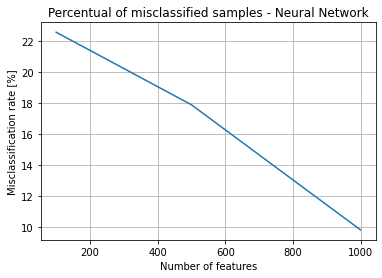

In [ ]:
misclassification_rates_percent = [100*item for item in misclassification_rates]
%matplotlib inline
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(N_features, misclassification_rates_percent)

# Add labels and title
ax.set_xlabel('Number of features')
ax.set_ylabel('Misclassification rate [%]')
ax.set_title('Percentual of misclassified samples - Neural Network')

# Display the plot
plt.grid()
plt.savefig('neural_network_misclassification.pdf', bbox_inches='tight')
files.download('neural_network_misclassification.pdf')
plt.show()